In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'https://raw.githubusercontent.com/habiburrahman-mu/exploratory-data-analysis/master/automobileEDA.csv'
df = pd.read_csv(path)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


Horsepower가 Price에 미치는 효과를 알아보자

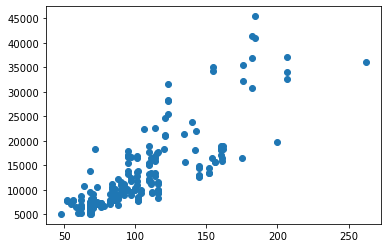

In [3]:
plt.scatter(x='horsepower', y='price', data=df)

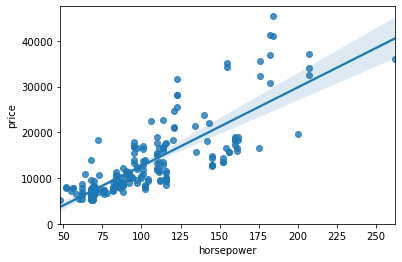

In [7]:
sns.regplot(x='horsepower', y='price', data=df)
plt.ylim(0,)
plt.show()

회귀 모형을 돌려보자
* x변수 하나인 경우 simple regression
$$ y = a + b*X + e $$
* x설명변수 y결과변수,종속변수

In [8]:
import statsmodels.api as sm

x = df[['horsepower']]
x = sm.add_constant(x) # 절편을 추가
y = df['price']

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     378.5
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           6.37e-48
Time:                        00:10:43   Log-Likelihood:                -1982.7
No. Observations:                 201   AIC:                             3969.
Df Residuals:                     199   BIC:                             3976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4597.5583    972.807     -4.726      0.0

경향성(Trends), 계절성(seasonality), 휴일(holidays)다른 변수도 고려해보자
* 다중회귀 multiple regression 
$$ y = a + b1*x1 + b2*x2 + b3*x3 + e $$

In [9]:
import statsmodels.api as sm

x = df[['horsepower','highway-mpg']]

size = df['length'] * df['height'] * df['width']
x['size'] = size

x = sm.add_constant(x)
y = df['price']

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           7.92e-59
Time:                        00:26:36   Log-Likelihood:                -1951.0
No. Observations:                 201   AIC:                             3910.
Df Residuals:                     197   BIC:                             3923.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.872e+04   5153.037     -5.573      

<ipython-input-9-7fd482434d6c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['size'] = size


# Compare Actual vs. Model Prediction

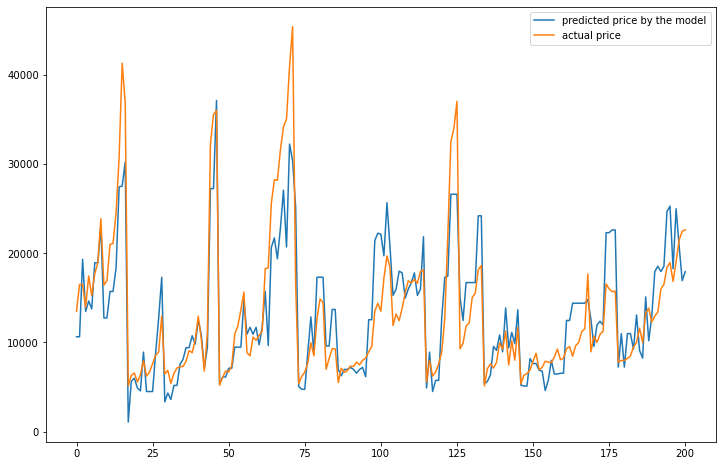

In [10]:
plt.figure(figsize=(12,8))

plt.plot(model.predict(x), label = 'predicted price by the model')
plt.plot(y, label = 'actual price')
plt.legend()
plt.show()

# Prediction error 예측오차(aka. Residual)

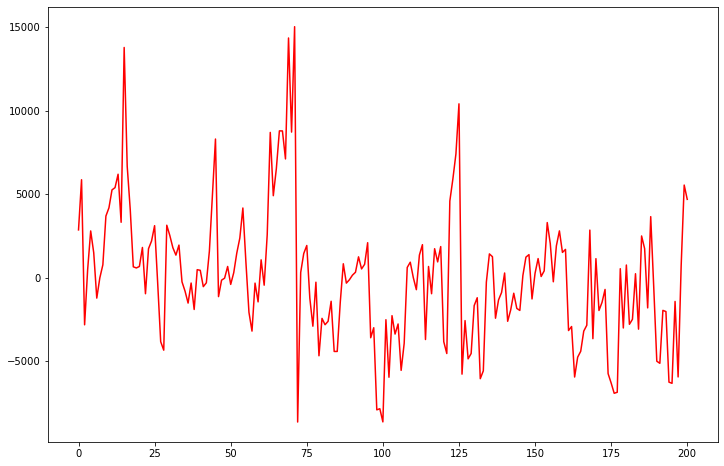

In [11]:
plt.figure(figsize=(12,8))

plt.plot(model.resid,'r')

# 오차의 제곱합 SSE(Sum of Squared Errors)

In [12]:
sse = np.sum(model.resid**2)
print(f'SSE = {sse}')
# 해찾기의 목표함수 (이것을 최소화하는 파라미터를 찾는 것)

SSE = 3173552362.888157
